# PANDAS 

## Pandas library has the broader goal of becoming the most powerful and flexible open source data analysis and manipulation tool available in any language.

## The Beginning: What Are Pandas Data Frames?
### Is a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. 

### They are defined as a two-dimensional labeled data structures with columns of potentially different types.

### In general, you could say that the Pandas data frame consists of three main components: the data, the index, and the columns.

### Besides the data that your DataFrame needs to contain, you can also specify the index and column names. The index, on the one hand, indicates the difference in rows, while the column names indicate the difference in columns.

# Data Structures: - Series and DataFrame

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
# pd.set_option('max_columns', 50)


## Series
### A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [3]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

### Alternatively, you can specify an index to use when creating the Series.


In [5]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'],)
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

### The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [6]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

#### You can use the index to select specific items from the Series ...


In [7]:
cities['Chicago']

1000.0

In [8]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

####  Or you can use boolean indexing for selection.



In [12]:
print(cities[cities < 1000])

Austin      450.0
Portland    900.0
dtype: float64


####  cities < 1000 returns a Series of True/False values, which we then pass to our Series cities, returning the corresponding True items.



In [10]:
less_than_1000 = cities < 1000
print(less_than_1000)
print('*********************** \n')
print(cities[less_than_1000])

Austin            True
Boston           False
Chicago          False
New York         False
Portland          True
San Francisco    False
dtype: bool
*********************** 

Austin      450.0
Portland    900.0
dtype: float64


### changing based on the index

In [11]:
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

('Old value:', 1000.0)
('New value:', 1400.0)


In [13]:
# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print cities[cities < 1000]

Austin      450.0
Portland    900.0
dtype: float64


Austin      750.0
Portland    750.0
dtype: float64


## Mathematical operations can be done using scalars and functions.


In [14]:
# divide city values by 3
cities / 3

Austin           250.000000
Boston                  NaN
Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
dtype: float64

In [15]:
# square city values
np.square(cities)

Austin            562500.0
Boston                 NaN
Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
dtype: float64

## You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).

In [16]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


### Notice that because Austin, Chicago, and Portland were not found in both Series, they were returned with NULL/NaN values. NULL checking can be performed with isnull and notnull.


In [17]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [18]:
# use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool


Boston   NaN
dtype: float64


## DataFrame
## A DataFrame is a data structure with rows and columns, like a spreadsheet, database table. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

### Reading Data

### To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.
### Using the columns parameter allows us to tell the constructor how we'd like the columns ordered. By default, the DataFrame constructor will order the columns alphabetically (though this isn't the case when reading from a file - more on that next).


In [21]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


## Dataset from a CSV file.
## Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

In [25]:
from_csv = pd.read_csv('datasample.csv')
from_csv.head(2)

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
0,1995,25,NYY,AL,5,3,0.625,5.51,19,10,...,0,301,84,1.507,9.5,1.5,4.0,6.9,1.70,NaN
1,1996,26,NYY,AL,8,3,0.727,2.09,61,0,...,1,425,240,0.994,6.1,0.1,2.8,10.9,3.82,CYA-3MVP-12


### Our file had headers. We could have passed header=None to the function along with a list of column names to use:

In [26]:
cols = ['num', 'game', 'date', 'team', 'home_away', 'opponent',
        'result', 'quarter', 'distance', 'receiver', 'score_before',
        'score_after']
no_headers = pd.read_csv('peyton-passing-TDs-2012.csv', sep=',', header=None,
                         names=cols)
no_headers.head()

,num,game,date,team,home_away,opponent,result,quarter,distance,receiver,score_before,score_after
0,1,1,2012-09-09,DEN,NaN,PIT,W 31-19,3,71,Demaryius Thomas,Trail 7-13,Lead 14-13*
1,2,1,2012-09-09,DEN,NaN,PIT,W 31-19,4,1,Jacob Tamme,Trail 14-19,Lead 22-19*
2,3,2,2012-09-17,DEN,@,ATL,L 21-27,2,17,Demaryius Thomas,Trail 0-20,Trail 7-20
3,4,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,38,Brandon Stokley,Trail 11-31,Trail 18-31
4,5,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,6,Joel Dreessen,Trail 18-31,Trail 25-31


In [27]:
# this is the DataFrame we created from a dictionary earlier
football.head()

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5


### Exporting our data to excel

In [28]:
# since our index on the football DataFrame is meaningless, let's not write it
football.to_excel('football.xlsx', index=False)

In [29]:
# delete the old DataFrame
del football

In [30]:
# read from Excel
football = pd.read_excel('football.xlsx', 'Sheet1')
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


## URL

## With read_table, we can also read directly from a URL. As long a valid link is provided. For example:


In [31]:
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'

# fetch the text from the URL and read it into a DataFrame
from_url = pd.read_table(url, sep='\t')
from_url.head(3)

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,$10,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,$9,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,$9.50.,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925


#### More examples reading online CSV datasets

In [32]:

url = 'https://redirect.viglink.com/?format=go&jsonp=vglnk_150580104072412&key=949efb41171ac6ec1bf7f206d57e90b8&libId=j7r70ik301021u9s000DAfhsh97p2&loc=https%3A%2F%2Fwww.r-bloggers.com%2Fgetting-data-from-an-online-source%2F&v=1&out=https%3A%2F%2Fsakai.unc.edu%2Faccess%2Fcontent%2Fgroup%2F3d1eb92e-7848-4f55-90c3-7c72a54e7e43%2Fpublic%2Fdata%2Fbycatch.csv&ref=https%3A%2F%2Fwww.google.com.hk%2F&title=Getting%20Data%20From%20An%20Online%20Source%20%7C%20R-bloggers&txt=https%3A%2F%2Fsakai.unc.edu%2Faccess%2Fcontent%2Fgroup%2F3d1eb92e-7848-4f55-90c3-7c72a54e7e43%2Fpublic%2Fdata%2Fbycatch.csv'

# fetch the text from the URL and read it into a DataFrame
from_url = pd.read_table(url)
from_url


,"Season,Area,Gear Type,Time,Tows,Bycatch"
0,"1989-90,North,Bottom,Day,48,0"
1,"1989-90,North,Bottom,Night,6,0"
2,"1989-90,North,Mid-Water,Night,1,0"
3,"1989-90,South,Bottom,Day,139,0"
4,"1989-90,South,Mid-Water,Day,6,0"
5,"1989-90,South,Bottom,Night,6,0"
6,"1989-90,South,Mid-Water,Night,90,23"
7,"1990-91,North,Bottom,Day,2,0"
8,"1990-91,South,Bottom,Day,47,0"
9,"1990-91,South,Mid-Water,Day,110,0"


In [33]:
# another, list of countries
url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries = pd.read_csv(url)
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [34]:
countries

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


In [35]:
countries[0:10]

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


In [36]:
countries[countries.Country == 'China']

,Country,Region
61,China,ASIA


### Stock market example with plot

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv')
df.head()

,AAPL_x,AAPL_y
0,2014-01-02,77.445395
1,2014-01-03,77.045575
2,2014-01-06,74.896972
3,2014-01-07,75.856461
4,2014-01-08,75.091947


In [38]:
df.size

480

In [39]:
df['AAPL_y'].mean()

90.10261204204173

In [40]:
df.AAPL_x = pd.to_datetime(df['AAPL_x'], format='%Y-%m-%d')
df.set_index(['AAPL_x'], inplace=True)

In [41]:
df.head()

,AAPL_y
AAPL_x,
2014-01-02,77.445395
2014-01-03,77.045575
2014-01-06,74.896972
2014-01-07,75.856461
2014-01-08,75.091947


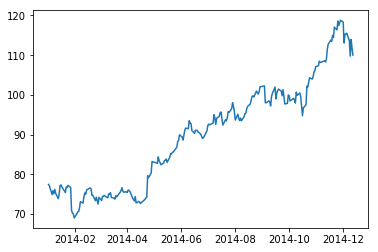

In [42]:
plt.plot(df.index, df.AAPL_y)
plt.show()

In [44]:
df.dtypes

AAPL_y    float64
dtype: object

In [45]:
df.head()

,AAPL_y
AAPL_x,
2014-01-02,77.445395
2014-01-03,77.045575
2014-01-06,74.896972
2014-01-07,75.856461
2014-01-08,75.091947


In [46]:
df.tail()

,AAPL_y
AAPL_x,
2014-12-08,113.653345
2014-12-09,109.755497
2014-12-10,113.960331
2014-12-11,111.817477
2014-12-12,110.027139


In [47]:
df.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-08', '2014-12-09', '2014-12-10',
               '2014-12-11', '2014-12-12'],
              dtype='datetime64[ns]', name=u'AAPL_x', length=240, freq=None)

In [48]:
df.shape

(240, 1)

In [49]:
df.describe()

,AAPL_y
count,240.000000
mean,90.102612
std,13.315813
min,69.004708
25%,75.892511
50%,91.551777
75%,99.627842
max,118.798656


In [50]:
df.sort_values(by='AAPL_y')

,AAPL_y
AAPL_x,
2014-01-31,69.004708
2014-01-30,70.034637
2014-02-03,70.040502
2014-01-29,70.235987
2014-02-04,70.500253
2014-02-05,70.599595
2014-01-28,70.904972
2014-02-06,71.506529
2014-02-27,72.503681


In [51]:
df

,AAPL_y
AAPL_x,
2014-01-02,77.445395
2014-01-03,77.045575
2014-01-06,74.896972
2014-01-07,75.856461
2014-01-08,75.091947
2014-01-09,76.202632
2014-01-10,75.230184
2014-01-13,73.848918
2014-01-14,75.011353
